# Part I - Loan Data Exploration
## by Robert Weber

## Introduction
This exploration is based on a dataset from online loan marketplace "Prosper,"containing 113,937 loans associated with 81 variables on each loan.


## Preliminary Wrangling


In [88]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [89]:
# Read in dataset
df = pd.read_csv("prosperLoanData.csv")

# Print shape and column types
print(df.shape)
print(df.dtypes)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [90]:
# Checking the overal structure of the dataset
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [91]:
# Check for overal distribution of data
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [92]:
# Convert CreditGrade and ProsperRating (Alpha) into ordered categorical types
ordinal_var = {'CreditGrade': ['NC','HR','E','D','C','B','A','AA'],
               'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA']}

for i in ordinal_var:
    ordered = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var[i])
    df[i]=df[i].astype(ordered)

In [93]:
# Clean the dataframe in keeping only the needed columns from the dataset and save as new dataset
df_new = df[['BorrowerAPR','CreditGrade','Term','ProsperRating (Alpha)','EmploymentStatus','IsBorrowerHomeowner','OpenCreditLines',
         'StatedMonthlyIncome','LoanOriginalAmount','ListingCategory (numeric)','CurrentDelinquencies','TradesNeverDelinquent (percentage)']]

In [94]:
# Show new dataframe
df_new.head()

,BorrowerAPR,CreditGrade,Term,ProsperRating (Alpha),EmploymentStatus,IsBorrowerHomeowner,OpenCreditLines,StatedMonthlyIncome,LoanOriginalAmount,ListingCategory (numeric),CurrentDelinquencies,TradesNeverDelinquent (percentage)
0,0.16516,C,36,NaN,Self-employed,True,4.0,3083.333333,9425,0,2.0,0.81
1,0.12016,NaN,36,A,Employed,False,14.0,6125.000000,10000,2,0.0,1.00
2,0.28269,HR,36,NaN,Not available,False,NaN,2083.333333,3001,0,1.0,NaN
3,0.12528,NaN,36,A,Employed,True,5.0,2875.000000,10000,16,4.0,0.76
4,0.24614,NaN,36,D,Employed,True,19.0,9583.333333,15000,2,0.0,0.95


### What is the structure of your dataset?

The dataset contains 113937 rows of loans with 81 attributes describing each loan. 61 columns contain numeric values, while the remaining columns contain either date time formats, boleans or categorical values.

The columns CreditGrade and ProsperRating (Alpha) contain values with an order based on the following sorting:

##### from worst to best
CreditGrade: NC,HR,E,D,C,B,A,AA <br>
ProsperRating (Alpha): HR,E,D,C,B,A,AA <br>

### What is/are the main feature(s) of interest in your dataset?

I am interested in finding out which attributes are responsible for predicting the Borrower's Annual Percentage Rate (APR) for the loan. From the main dataset, I base my exploration on a selection of 12 features that will help in finding out more about my feature of interest and the relationship to the other attributes.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that the most influence will come from columns like the EmploymentStatus, OpenCreditLines, StatedMonthlyIncome, and TradesNeverDelinquent. Other features like IsBorrowerHomeowner or the Term of the loan can also play a role in the APR, but in a smaller scale.

## Univariate Exploration

### Borrower Annual Percentage Rate (APR)
I start by looking at my variable of interest: the Borrower Annual Percentage Rate (APR). The Borrower APR is the yearly interest rate a borrower has to pay for a taken loan.
I want to know about the overall distribution of the Interest Rates across my dataset.

In [95]:
# First I need to check for NAN values and remove them as I am otherwise running into an error printing the plot
df_new.BorrowerAPR.isna().sum()

# Remove NAN values
df_new.dropna(subset=['BorrowerAPR'], inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

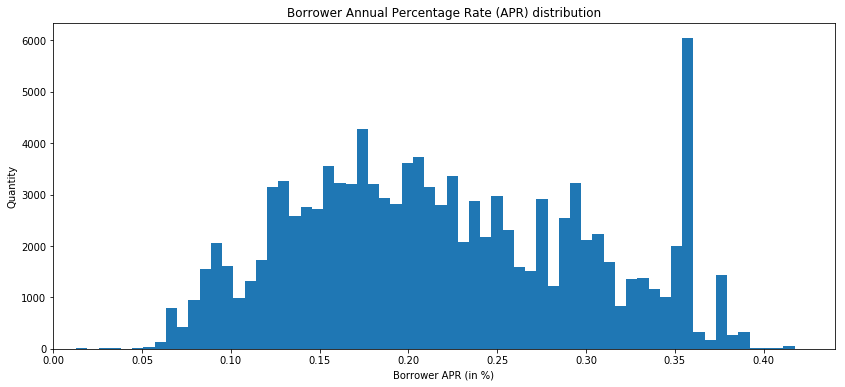

In [96]:
# Plot histogram
plt.figure(figsize=[14, 6])
plt.hist(data=df_new, x='BorrowerAPR', bins=80);
plt.xlim((0,0.44))
plt.xlabel('Borrower APR (in %)')
plt.ylabel('Quantity')
plt.title('Borrower Annual Percentage Rate (APR) distribution')

# Check distribution
df_new.BorrowerAPR.describe()

The APR for the borrowers range from extreme low rates at around 0.006 to rates up to 0.51, while the most notable ones are in the range from 0.05 to 0.4. The rate is normaly distributed with a mean of around 0.22. There is a notable spark at 0.36.

Next I will look at the monthly income of the borrowers to get an overview of the income distribution.

### Stated monthly income
As I later want to know the correlation between income and the Borrower APR, I first need to know about the overall distribution of the income of the borrowers taking a loan.

count    113911.000000
mean       5591.659113
std        5404.853643
min           0.000000
25%        3200.000000
50%        4666.666667
75%        6816.666667
max      618547.833333
Name: StatedMonthlyIncome, dtype: float64

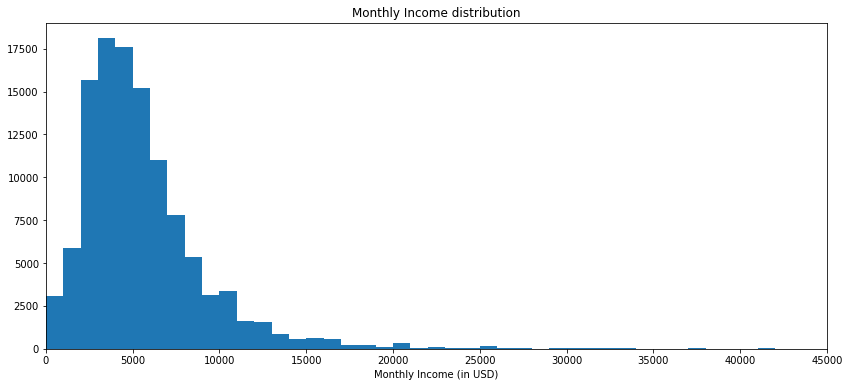

In [97]:
# Plot histogram
plt.figure(figsize=[14, 6])
bins=np.arange(0, df_new['StatedMonthlyIncome'].max()+1000,1000)
plt.hist(data=df_new, x='StatedMonthlyIncome', bins=bins);
plt.xlim((0,45000))
plt.xlabel('Monthly Income (in USD)')
plt.title('Monthly Income distribution')

# Check distribution
df_new.StatedMonthlyIncome.describe()

# Get max value
df_new.StatedMonthlyIncome.max()

# There is a huge outlier with around 1.75 mio USD in monthly income that I will remove for further analysis
df_new = df_new.query("StatedMonthlyIncome != 1750002.9166669999")

# Check distribution of income
df_new['StatedMonthlyIncome'].describe()

The histogram is right-scewed with a mean in monthly income of 5660 USD. As it is showing a log-normal distribution, I will perform a scaling of the x-axis to a log-type to get a better view on the distribution of the income between 0 and 5000.

In [98]:
# Check distribution of income in log10
np.log10(df_new['StatedMonthlyIncome'].describe())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


count    5.056566
mean     3.747541
std      3.732784
min          -inf
25%      3.505150
50%      3.669007
75%      3.833572
max      5.791373
Name: StatedMonthlyIncome, dtype: float64

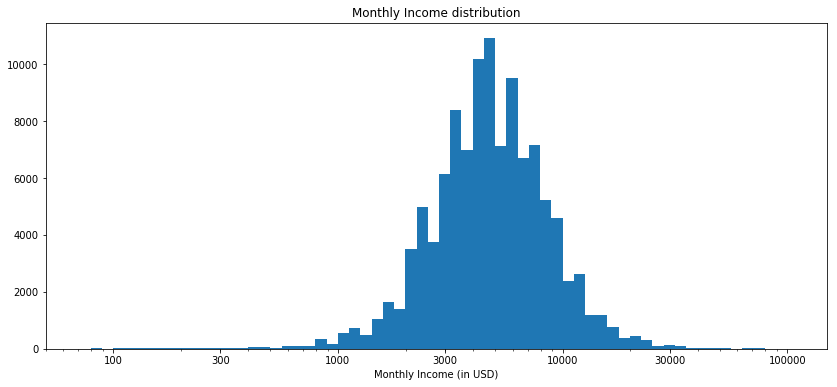

In [99]:
# Plot histogram
plt.figure(figsize=[14, 6])
bins = 10**np.arange(-0.1, 5.8+0.05, 0.05)
ticks = [0.1,0.3,1,3,10,30,100,300,1000,3000,10000,30000,100000]
labels = ['{}'.format(i) for i in ticks]

plt.hist(data=df_new, x='StatedMonthlyIncome', bins=bins);
plt.xscale('log')
plt.xticks(ticks, labels);

plt.xlim((50,150000))
plt.xlabel('Monthly Income (in USD)')
plt.title('Monthly Income distribution');

After the transformation to log-type we get a better picture on the distribution of the monthly income of the borrowers. While the majority of borrowers have a monthly income between 4000 annd 6000 USD, we also have borrowers with a monthly income of below 1000 USD, even down to 100 USD.
On the other side there are borrowers earning motre than 10k USD monthly, even succeeding 30k per month.

### Loan amount
For further exploration I am interested in the distribution of the loan amount a borrower is taking.

count    113911.000000
mean       8338.053744
std        6245.954783
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

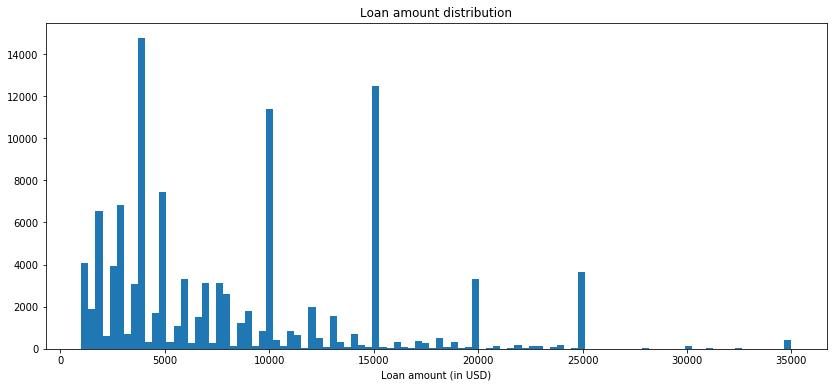

In [100]:
# Plot Loan amount
plt.figure(figsize=[14, 6])
plt.hist(data=df_new, x='LoanOriginalAmount', bins=100);
plt.xlabel('Loan amount (in USD)')
plt.title('Loan amount distribution')

# Check distribution
df_new.LoanOriginalAmount.describe()

The histogram is slightly right skewed with the majority of taken loans between 1000 and 10.000 USD. The minimum loan amount a borrower can take is 1000 USD. The loan amount most often taken is at 4000 USD. Also there are frequent spikes every 5000 USD starting at 5000 (then 10000, 15000, 20000,..) seeming to be the most popular choices in loan taking.

### Open credit lines
Next I want to know more about the number of credits a borrowers has taken, that are still open at the time he is taking the current loan.

In [101]:
# Check for NAN values
df_new.OpenCreditLines.isna().sum()

# Remove NAN values
df_new.dropna(subset=['OpenCreditLines'], inplace=True)

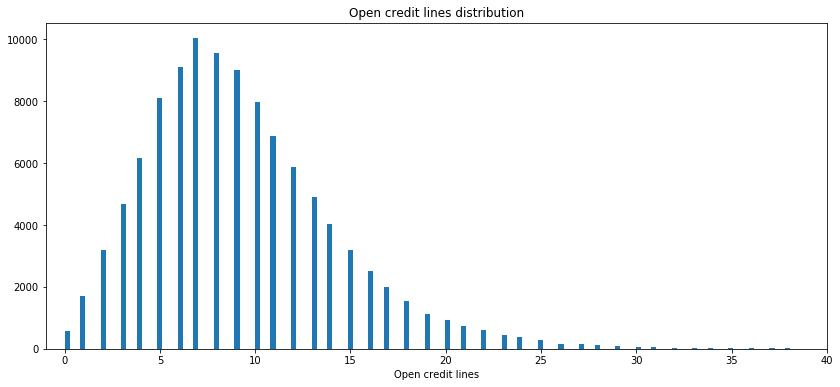

In [102]:
# Plot
plt.figure(figsize=[14, 6])
color=sb.color_palette()[0]

plt.hist(data=df_new, x='OpenCreditLines', bins=200);
plt.xlabel('Open credit lines')
plt.title('Open credit lines distribution')
plt.xlim(-1,40);

The open credit lines plot shows a right-scewed distribution with open credit lines per borrower ranging from 0 up to 40. Seven open credits is the most often appearing number amongst borrowers, when taking a new loan, while the majority of the borrowers have three to twelve open credits present. The numbers are going down after seven credit lines, but still it is surprisig to see that there are only a few hundred borrowers without ony open credit line (at least at the time of taking the current credit line) and almost all borrowers need to serve more than one open credit line at that time, even having borrowers in the dataset with more then 20 open credit lines at the same time.
I am really curious to see if the open credit lines are having an effect on the Borrower APR and/or the credit ratings as the risk of not being able to serve a credit could be higher with rising credit lines.

### Term
I want to know more about the terms a borrowers loan is running and the distribution of these. 

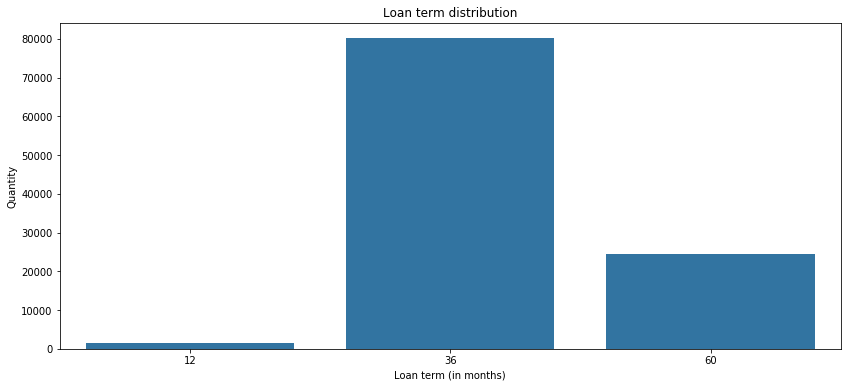

In [103]:
# The values in the "Term" are numbers, but as there are only three of them
# and they are more or less acting as a categorical number, I plot them within a countplot
plt.figure(figsize=[14, 6])
color=sb.color_palette()[0]
sb.countplot(data=df_new, x='Term', color=color)

plt.xlabel('Loan term (in months)')
plt.ylabel('Quantity')
plt.title('Loan term distribution');

Credit loans only have runtimes of 12, 36, and 60 months. The vast majority of credits taken have a term of 36 months (3 years) with almost 80.000 borrowers. Followed by 60 months (5 years) with over 20.000 borrowers and then 12 months (1 year) with less than 5.000 borrowers. It seems a three year runtime is the best choice for most borrowers. Either because the Borrower APR is lower than with 12 months, or because of the monthly available income to be paid back to the lenders, or the the overall credit lone amount. I will have a look at the distribution between APR and Term later in the bivariate exploration.

### Home owner
I need to see how many home owners are amongst the borrowers, as I think this feature will also have an impact in influencing the Borrower APR. A house owned by the borrower could serve as an additional security for Prosper in case the borrower is not able to pay the credit back anymore. The data doesn't provide information on if the house is still burdenend with other loans or if it is loan free, but this shouldn't matter here in our exploration.

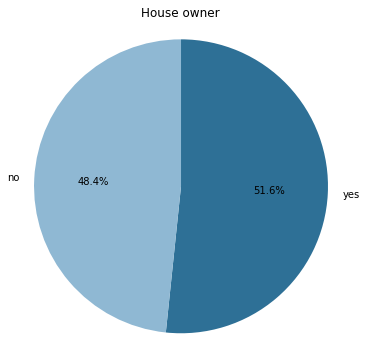

In [104]:
# Plot
plt.figure(figsize=[14, 6])
count=df_new.IsBorrowerHomeowner.value_counts()
labels=['yes','no']
colors = ["#2e7096", "#8fb8d3"]

plt.pie(count, labels = labels,startangle=90,counterclock=False,autopct='%1.1f%%', colors=colors)
plt.title('House owner')
plt.axis('square');

The distribution of house owners and non-owners amongst the data is almost even, with 51.6 percent of the borrowers owning a house, and 48.4 percent of the borrowers not owning a house. I will later see, if I can find some relations between the house ownership and the APR.

### Employment status
The status of the borrowers in regards to having a job or not, or being retired at the time of taking the loan. This feature could have an influence in the Borrower APR as I suspect borrowers that are emloyed having better/lower APR to pay than for example people that are unemployed.

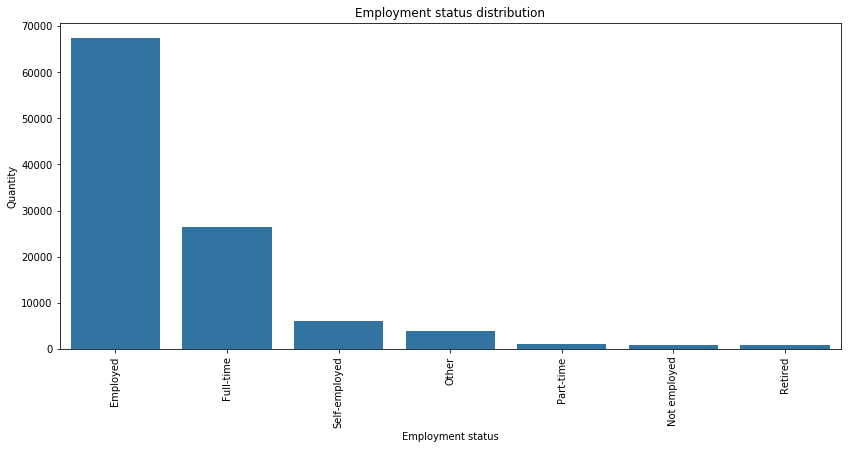

In [105]:
# Plot
plt.figure(figsize=[14, 6])
color=sb.color_palette()[0]
count=df_new['EmploymentStatus'].value_counts().index
sb.countplot(data=df_new, x='EmploymentStatus', color=color, order=count)

plt.xlabel('Employment status')
plt.ylabel('Quantity')
plt.title('Employment status distribution')
plt.xticks(rotation=90);

While the vast majority of the borrowers selected the employment status of "Employed", the second highest number comes from borrowers selected "Full-time". "Full-time", "Self-employed", and "Part-time" are all variations of being employed and so I will replace these values with "Employed" in the next step. Also as the value "Other" doesn't provide any useful information, I will remove it from the data.

In [106]:
# Replace "Full-time", "Self-employed", and "Part-time" with "Employed"
df_new=df_new.replace({'EmploymentStatus':{'Full-time':'Employed','Self-employed':'Employed','Part-time':'Employed'}})

# Remove entries with employment status "Other"
df_new=df_new.query("EmploymentStatus !='Other'")

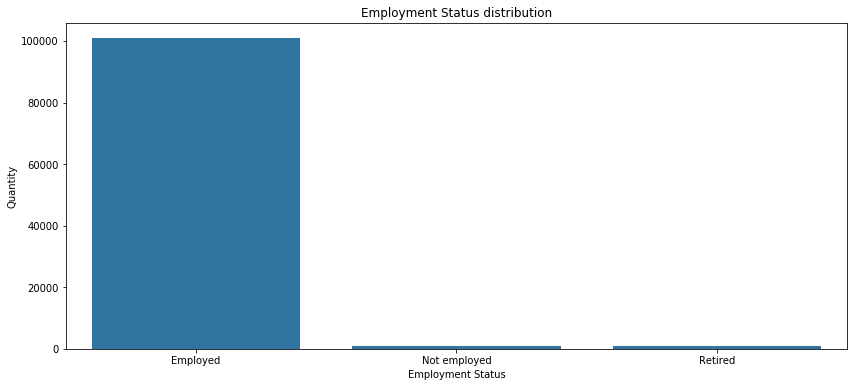

In [107]:
# Plot
plt.figure(figsize=[14, 6])
color=sb.color_palette()[0]
count=df_new['EmploymentStatus'].value_counts().index
sb.countplot(data=df_new, x='EmploymentStatus', color=color, order=count)

plt.xlabel('Employment Status')
plt.ylabel('Quantity')
plt.title('Employment Status distribution');

After merging all employment variations into "Employed", we have the most borrowers with approximately 100k being employed,  followed by borrowers with the status "Not employed", and "Retired". I am curious to find out later, if the APR is being influenced by the employment status or not.

### Listing category
Next I want to find out the distribution of categories a loan is taken for. In the bivariate exploration I will need this to check if the category for a loan is affecting its APR.

In [108]:
# First I replace the numeric values with categorical names
df_new = df_new.replace({'ListingCategory (numeric)':{0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan',
                                         5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure',
                                         11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases',
                                         15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}})

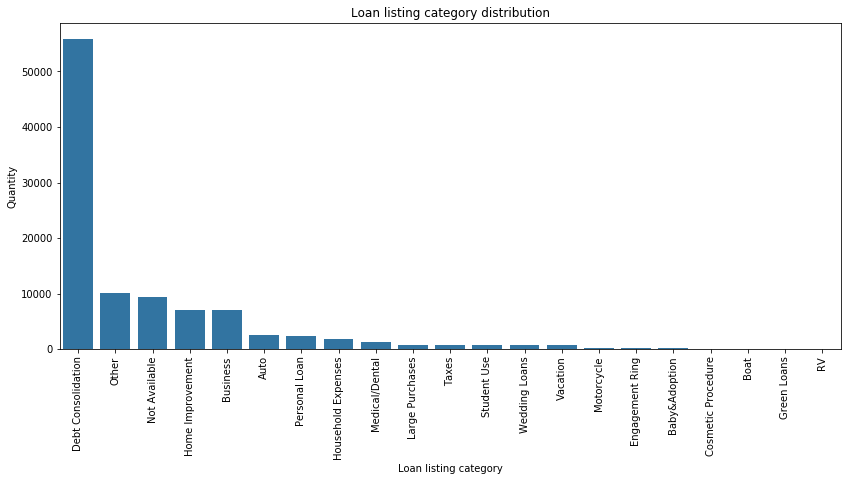

In [109]:
# Plot
plt.figure(figsize=[14, 6])
color=sb.color_palette()[0]
count=df_new['ListingCategory (numeric)'].value_counts().index
sb.countplot(data=df_new, x='ListingCategory (numeric)', color=color, order=count)

plt.xlabel('Loan listing category')
plt.ylabel('Quantity')
plt.title('Loan listing category distribution')
plt.xticks(rotation=90);

The distribution shows that over half of the taken credit loans is being used for paying off other credit. Leaving "Other" and data of not available categories aside, next most often used loans are for Home Improvement, Business, and Auto/Car.

### Trades never delinquent
Delinquent trades are loans that are past due. The values of this feature show to which percentage all loans the borrower took so far were not delinquent. With this exploration I want to know about the distribution of delinquent loan as these could be of importance for the APR.

In [110]:
# First I convert the column values into a percentage
df_new['TradesNeverDelinquent (percentage)'] = df_new['TradesNeverDelinquent (percentage)'] * 100

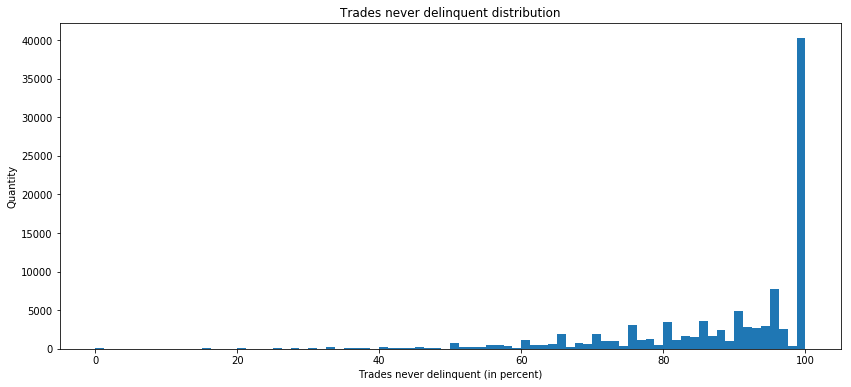

In [111]:
# Plot
plt.figure(figsize=[14, 6])
plt.hist(data=df_new, x='TradesNeverDelinquent (percentage)', bins=80)

plt.xlabel('Trades never delinquent (in percent)')
plt.ylabel('Quantity')
plt.title('Trades never delinquent distribution');

Most occurences of trades that are never delinquent is 100 percent with over 40.000. But there are still huge numbers of trades that only have a quote of 90 or 80 percent, while going down to trades where 50 percent of the trades of a borrower are past due.



### Discuss the distribution of your variable of interest. Were there any unusual points? Did you need to perform any transformations?

The APR for the borrowers follows a normal distribution with low rates at around 0.006 to rates up to 0.51 whereas no transformation was needed to perform. There is a prominent spark at 0.36.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

To plot the OpenCreditLines feature in a hist, I needed to remove all NAN values from the column as it was throwing an error otherwise. As the StatedMonthlyIncome was log-normally distributed, I needed to perform a transformation in order to get a better view on the distribution.
In the EmploymentStatus feature I replaced all values related to "Employed" like "Part-time" or "Full-time" with the value "Employed" to generate one common value for the occupation and removed values with "Other".

As values in the ListingCategory were numbers representing given categories, I needed to replace the numbers with the appropriate category name to make working with the date more easy.
The TradesNeverDelinquent feature contains percentage values like 0.1 representing 10 percent. In order to provide a better vizualisation for the x-axis I multiplied the values of the column with 100 to create full percentage values like 10 percent instead of 0.1.

## Bivariate Exploration

In this section I will explore the correlation between various variables within a bivariate exploration. First, I will plot the correlations between the numeric features in a heatmap.

In [112]:
# Define numeric and categoric variables
numeric_vars = ['BorrowerAPR','Term','OpenCreditLines','StatedMonthlyIncome', 'LoanOriginalAmount','CurrentDelinquencies','TradesNeverDelinquent (percentage)']
categoric_vars=['EmploymentStatus','IsBorrowerHomeowner','CreditGrade','ProsperRating','LoanStatus']

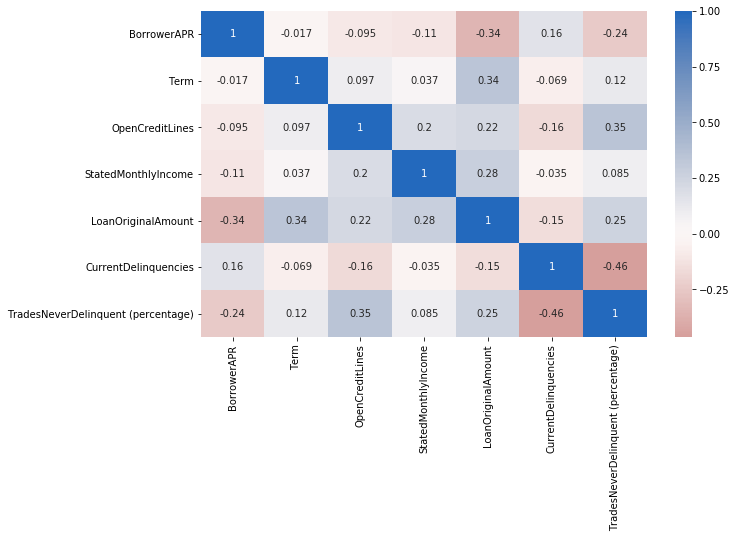

In [113]:
# Plot heatmap
plt.figure(figsize=[10, 6])
sb.heatmap(df_new[numeric_vars].corr(), annot=True, cmap='vlag_r', center=0);

Against my prediction, there is only a low negative correlation between the Borrower APR and the Open credit lines. Also the Monthly income is barely correlating with the APR. As I was looking at the Term in the univariate exploration and as there seems to be only a low negative correlation tp APR, I will still look at the details within a diagram.
The APR instead shows a moderate negative correlation with LoanOriginalamount as well as TradesNeverDelinquent. I will investigate these in a bivariate exploration in this section.

### Loan amount vs Borrower APR
The correlation between the amount of the loans taken and the Borrower APR is of interest in the next plot as there seems to be a negative correlation between both features.

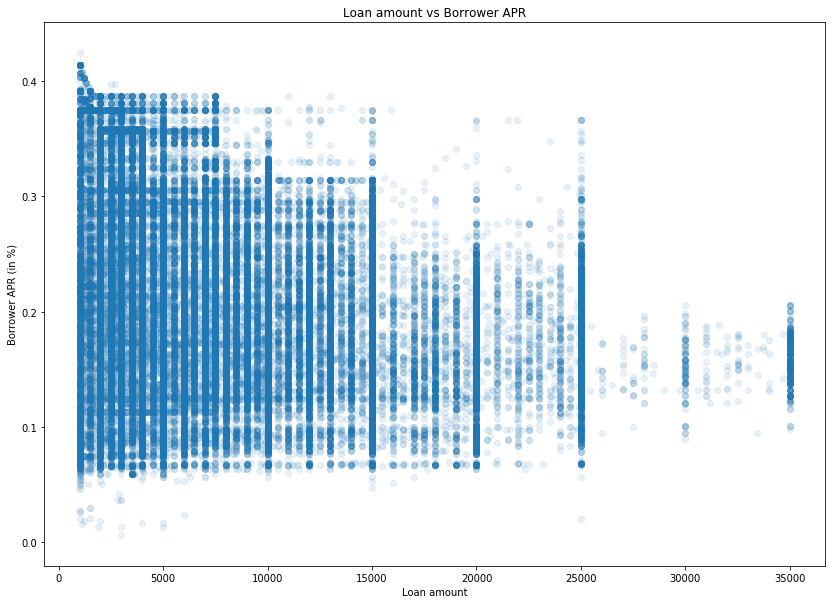

In [114]:
# Plot
plt.figure(figsize=[14, 10])
plt.scatter(data=df_new, x='LoanOriginalAmount', y='BorrowerAPR', alpha=0.1)

plt.xlabel('Loan amount')
plt.ylabel('Borrower APR (in %)')
plt.title('Loan amount vs Borrower APR');

As the heat matrix was showing earlier and this plot shows in more detail, there is a negative correlation between the loan amount and the borrower APR. The higher the loan amount, the lower the average interest rate for the borrower. While there a different rates applied for each loan amount, the min-max-span of this rate is getting narrower with rising loan amount. Spanning from 0.05 to over 0.4 for loans at 1000 USD to spans from 0.1 to 0.2 for loans at 35.000 USD.

### Never delinquent trades vs Borrower APR
Next I'll have a look at the other prominent corelation: Borrower APR vs the percentage of trades that are not delinquent. 

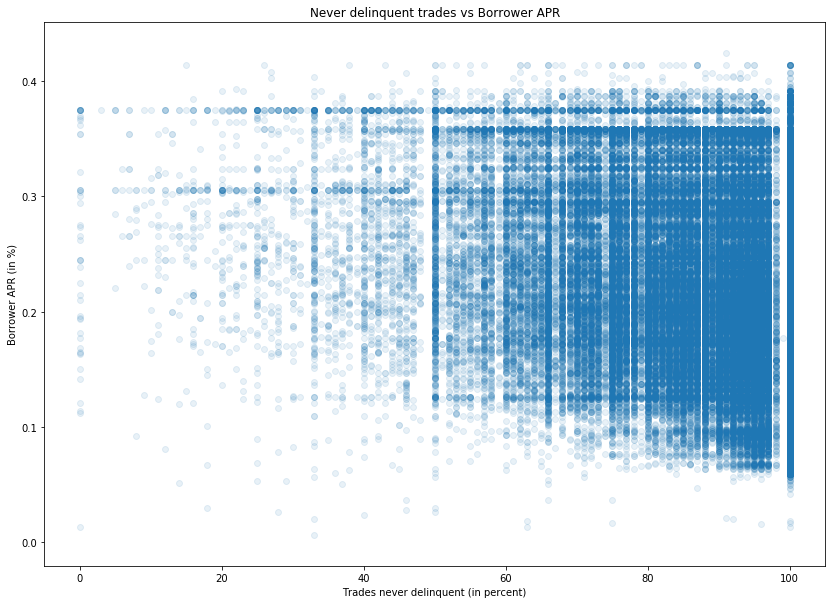

In [115]:
# Plot
plt.figure(figsize=[14, 10])
plt.scatter(data=df_new, x='TradesNeverDelinquent (percentage)', y='BorrowerAPR', alpha=0.1)

plt.xlabel('Trades never delinquent (in percent)')
plt.ylabel('Borrower APR (in %)')
plt.title('Never delinquent trades vs Borrower APR');

The plot shows that with a higher percentage of loans that are not delinquent or past due, the span for loans is broad in ranging from 0.05 to 0.4. The lesser this percentage, meaning the more past du credits a borrower has at the moment, the higher the Borrower APR on average. Borrowers with a low percentage in trades never delinquent (ergo a high percentage in loans past due), barely have advantage of lower APR. Also the borrowers falling into this sector are getting fewer to more past due credit lines the borrower has.

### Lending term vs Borrower APR
According to the heatmap there seems to be a low correlation between the Term and the APR, but I nevertheless want to have a look at the distribution of the APR per loan term.

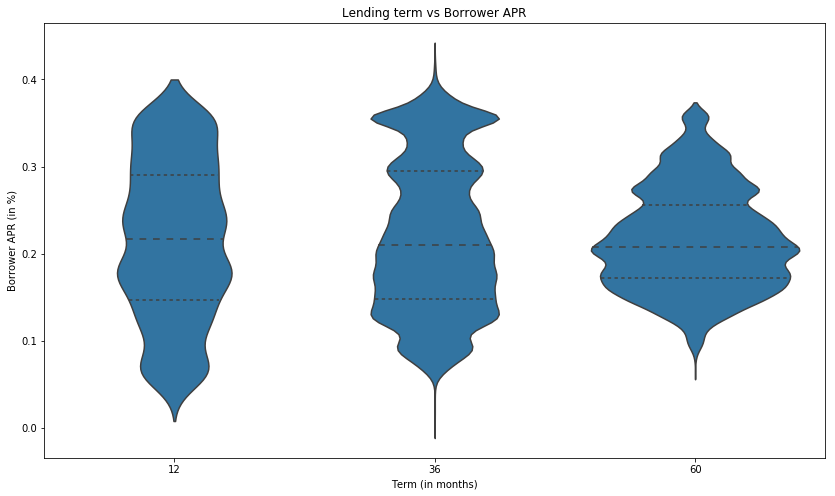

In [116]:
# Plot
plt.figure(figsize=[14, 8])
color=sb.color_palette()[0]

sb.violinplot(data=df_new, x='Term', y='BorrowerAPR', color=color, inner='quartile')
plt.xlabel('Term (in months)')
plt.ylabel('Borrower APR (in %)')
plt.title('Lending term vs Borrower APR');

While the median of the Borrower APR is getting lower from 12 month loan to 36 term loans, the median at 60 months doesn't change anymore in comparison to the median from the 36 month term. The range of the Borrower APR is getting smaller with a rising loan term, while the distribution of the APR is getting more diverse. In the 12 month term distribution the APR is without any notable peaks, the 36 term is showing a main and constant distribution between 0.12 and 0.25, with peaks at 0.3 and 0.36, and the 60 month term is showing the mayority of APR between 0.12 and 0.25. So surprisingly this plot shows a nice outcome in regards to the relationship. The correlation is low, but the distribution of APR per term can be seen nicely. Based on these findings we can say that the APR range is getting smaller or more consolidated with rising loan terms. While shorter terms show a wide span of different rates, the rate span is narrowing down with longer terms.

### Credit Grade and Prosper Rating vs Borrower APR
Next I will have a look at the relationship of the categorical features with the Borrower APR. I start by looking at the CreditGrade and the ProsperRating (Alpha) and their influence on the Borrower APR. I would assume that the APR is rising the worser the rating score gets. But let's find out.

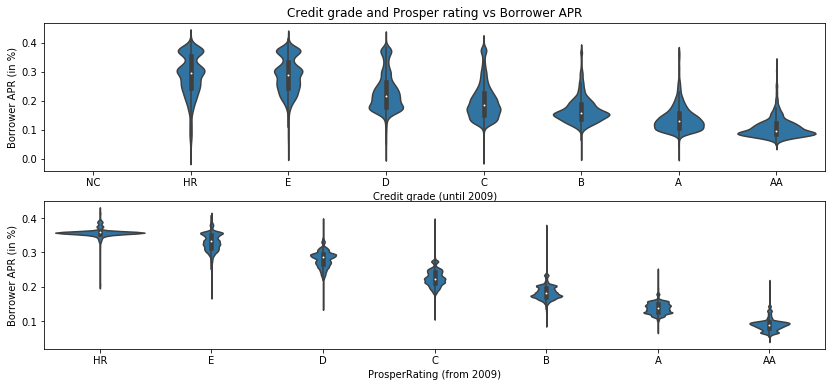

In [117]:
# Plot
plt.figure(figsize=[14, 6])
color=sb.color_palette()[0]

plt.subplot(2,1,1)
sb.violinplot(data=df_new, x='CreditGrade', y='BorrowerAPR', color=color)
plt.xlabel('Credit grade (until 2009)')
plt.ylabel('Borrower APR (in %)')
plt.title("Credit grade and Prosper rating vs Borrower APR")

plt.subplot(2,1,2)
sb.violinplot(data=df_new, x='ProsperRating (Alpha)', y='BorrowerAPR', color=color)
plt.ylabel('Borrower APR (in %)')
plt.xlabel('ProsperRating (from 2009)');

As expected, the plots show a strong correlation between the rating scores and the Borrower APR. The higher/better the rating, the lower the borrower rate/interest rate a borrower has to pay. While the old rating until 2009 based on the Credit Grade already gave away a picture of higher interest with worsening scores, we still see some overlap between the scores and the distribution in the rates. 
The new score from 2009 onwards shows a clearer demarcation between the scores and the interest rate distribution and provides a much clearer correlation than the old rating. Here every rating has only a small overlap of the span of the interest rate with the upcoming rating, like AA going from 0.05 to 0.15 and A going from 0.10 to 0.17. 

### Home owner vs Borrower APR
I want to find out if the house owner status is also playing an influence in the Borrower APR as I predict owning a house while taking the loan could relate to a higher score rating and therefore a lower average APR than non-owners.

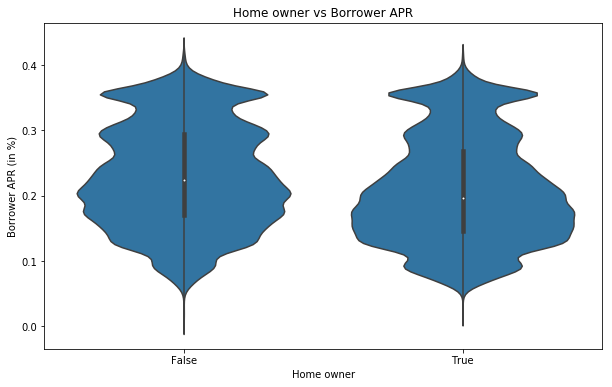

In [118]:
# Plot
plt.figure(figsize=[10, 6])
color=sb.color_palette()[0]
sb.violinplot(data=df_new, x='IsBorrowerHomeowner', y='BorrowerAPR', color=color)

plt.xlabel('Home owner')
plt.ylabel('Borrower APR (in %)')
plt.title('Home owner vs Borrower APR');

On the first look both plots show an almost identical outcome, with min and max at the same heights. But looking closer, we see that the 25 percent, median, and 75 percent distribution show that house owners have on average a lower Borrower APR than non-owners. The impact on the loan rate is small indeed, with a difference in the median from non-owners to owners from 0.225 to 0.2 but we see the tendency of smaller loans for house owners in comparison to non-owners. So a house can play a role in getting a better scoring as it could be used as a safety in case the loans are not payable anymore by the borrowers.

### Employment status vs Borrower APR

Next I want to find out about the employment status and if the status of being employed plays a role in predicting the APR.

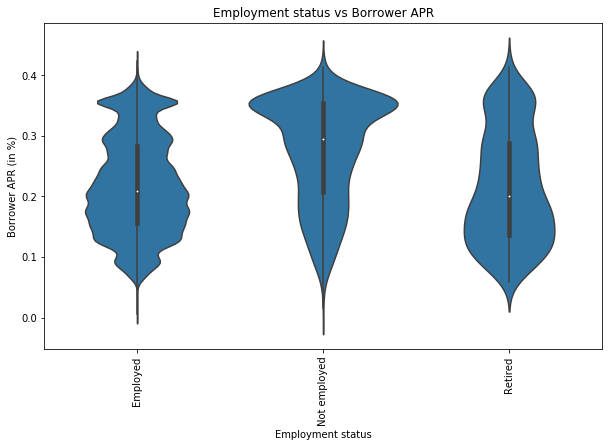

In [119]:
# Plot
plt.figure(figsize=[10, 6])
color=sb.color_palette()[0]
count=df_new['EmploymentStatus'].value_counts().index
sb.violinplot(data=df_new, x='EmploymentStatus', y='BorrowerAPR', order=count, color=color)

plt.xlabel('Employment status')
plt.ylabel('Borrower APR (in %)')
plt.title('Employment status vs Borrower APR')
plt.xticks(rotation=90);

Comparing the Borrower APR along the employment status shows that most borrowers that are not employed while taking the loan are paying a higher APR than borrowers that are employed. While the median for nor employed borrowers is around 0.3, it as at around 0.2 for employed borrowers, giving employed borrowers a better chance of getting access to lower APR.<br>
Retired borrrowers are having a high distribution in the lower digits of the Borrower APR, similar to being employed. I will have a look in the multivariate exploration if owning a house plays a role in these low rates for retired borrowers. <br>
Also what we don't see is if the loan amount or loan term also differs between the employment status what I will explore in the multivariate section.

### Listing category vs Borrower APR

In order to see if the reason for taking a loan is also an indicator for the APR, I will look at the distribution of the Borrower APR amongst different loan listing categories. As borrowers select such a category when applying for a loan, I will look at some characteristics amongst them.

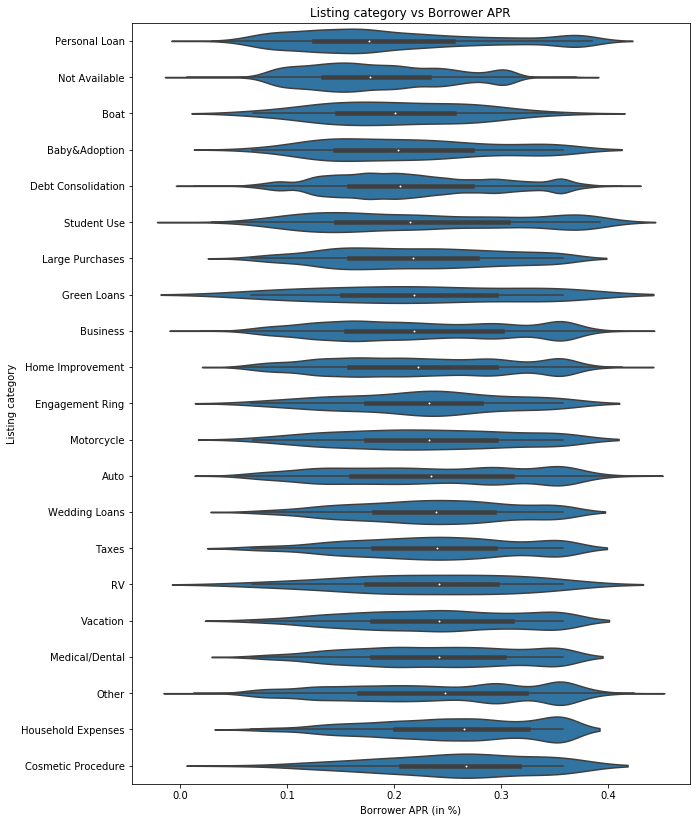

In [120]:
# Plot
plt.figure(figsize=[10, 14])
color=sb.color_palette()[0]

count=df_new.groupby('ListingCategory (numeric)').median().sort_values('BorrowerAPR', ascending=True).index
sb.violinplot(data=df_new, y='ListingCategory (numeric)', x='BorrowerAPR', order=count, color=color)

plt.xlabel('Borrower APR (in %)')
plt.ylabel('Listing category')
plt.title('Listing category vs Borrower APR');

Looking at the median of all loan categories, borrowers in the category "Personal Loan" pay in comparison to other categories the lowest median APR with circa 0.18. While on the other end a borrower taking a credit for "Household Expenses" or "Cosmetic Procedure" needs to consider paying much higher fees as it is shown with a median of 0.27. So loans in these categories have a tendency to be more expensive than moderate loans for buying a car or motorcycle, while loans  for personal use or dept consolidation count to loans that seem to be cheaper in comparison.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature of interest vary with other features in the dataset?

I found out that with a higher loan term the number of borrowers with a intermediate Borrower APR of 0.2 is higher than with borrowers taking on shorter loan terms. In total the Borrower APR is getting smaller and the variations to max and min are getting smaller with rising terms.

The more credit loans a borrower has that are past due, the higher his Borrower APR.

While exploring the relationship of the loan amount with the Borrower APR I found that the higher the loan amount, the lower the variation in the Borrower APR. In smaller amounts there seem to be many other factors present that can influence the actual APR, while with higher loan amounts the the APR is getting reduced to rates between 0.1 and 0.2.

The higher a borrower is rated by Prosper, the lower the Borrower APR. The APR also shows a tendency to be lower in total for borrowers that are house owners. By looking at the relationship between the APR and employment status we can also see that employed and retired borrowers pay on average less higher fees than not employed borrowers. 

### Did you observe any interesting relationships between the other features (not the main feature of interest)?

I had a look at the relationship between monthly loan payment and the taken loan amount and interestingly were able to see three distinguished lines showing up in the plot. These lines could indicate the loan term a borrower is paying back the taken loan. The steeper the lines, the shorter the loan term.<br>
Additionally looking at loans per category it can be said that personal loans seem to be lower on APR than loans for cars, medical reasons or household expenses.

## Multivariate Exploration
In this section I will explore the correlation between multiple features. I will continue soem findings from the bivariate exploration and will look for other possible correlations.

### Borrower APR across home owner and employment status
In the last section I looked at the relation between employment status and the Borrower APR. Now I will add another feature and will have a look at if the status of owning a house plays an additional role int he heigth of the Borrower APR.

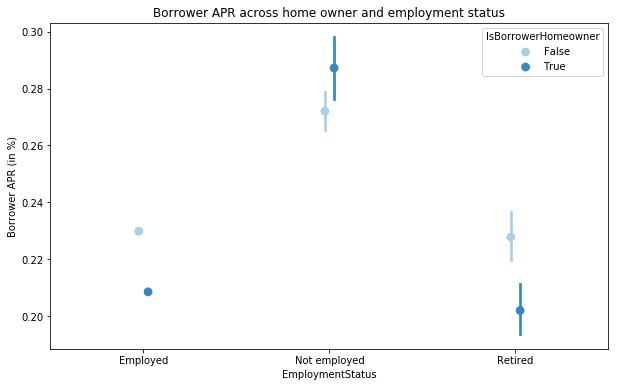

In [121]:
# Plot
plt.figure(figsize=[10,6])
sb.pointplot(data=df_new, x="EmploymentStatus", y="BorrowerAPR", hue="IsBorrowerHomeowner", palette="Blues", linestyles="", dodge=True)
plt.title("Borrower APR across home owner and employment status")
plt.ylabel('Borrower APR (in %)');

The data shows an interesting outcome as borrowers that are employed or retired and own a house have indeed a lower borrower rate to pay than non-owners. Even taking the error rate into account for the rates of the retired borrowers, 
the rate is still lower than with retired borrowers not owning a house.<br>
A rather unexpected outcome is shown for not employed borrowers. Here house owners pay even more APR than non-owners. There is an error rate to consider that is overlapping between the two house status showing, that the point could also be lower or higher. An explanation for a higher APR for unemployed house owners could be, that if the house is still being paid off by other loans, the monthly financial load is higher and therefor the risk for overdue payments could be higher.

### Loan original amount in comparison with Employment status and Borrower APR
As brought up in the bivariate exploration, I want to know now if the loan amount also plays a role when looking at the employment status in relation to tthe Borrower APR.

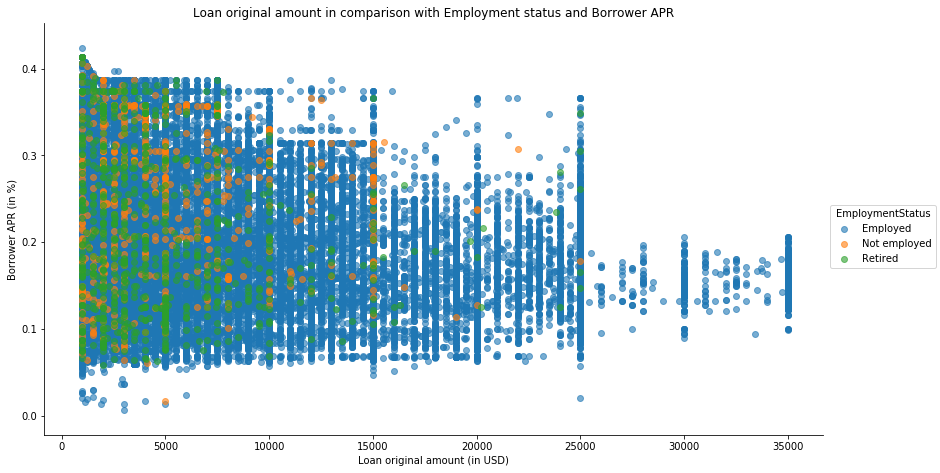

In [124]:
# Plot
g=sb.FacetGrid(data=df_new, hue='EmploymentStatus', size=6.5, aspect=1.8)
g.map(plt.scatter,'LoanOriginalAmount', 'BorrowerAPR', alpha=0.6)
g.add_legend()

plt.xlabel('Loan original amount (in USD)')
plt.ylabel('Borrower APR (in %)')
plt.title('Loan original amount in comparison with Employment status and Borrower APR');

By first looking at the employed borrowers, we can see that they tend to pay lower fees the higher the loan amount, with loan amounts going up to 35.000 USD. But in general they cover the whole range of fees for loans from 1.000 to 25.000 USD, with a big drop in APR heigth for loans bigger than 25k.<br>
Another picture shows for the unemployed borrowers. While they seem to also take advantage of low APR for credits at 1.000 USD, the picture changes fast as the rates increase the higher the loan amount and up until 15k USD. Most of the unemployed borrowers can be found taking loans between 1.000 and 5.000 USD.<br>
The mayority of retired borrower on the other hand, seems to take loans from 1.000 to 15k USD the most. Similar to the employed borrower they can also be found paying APR within the whole span, but other than the employed borrower, there is a tendency for retired borrowers to pay even lower APR at lower loan amounts. So the variety isn't that large anymore with rising loan amounts and the APR span is smaller than for employed borrowers.

### Loan term in comparison with Employment status and Borrower APR
Next I need to know how the loan term differs between the various employment status to see the influence on the Borrower APR.

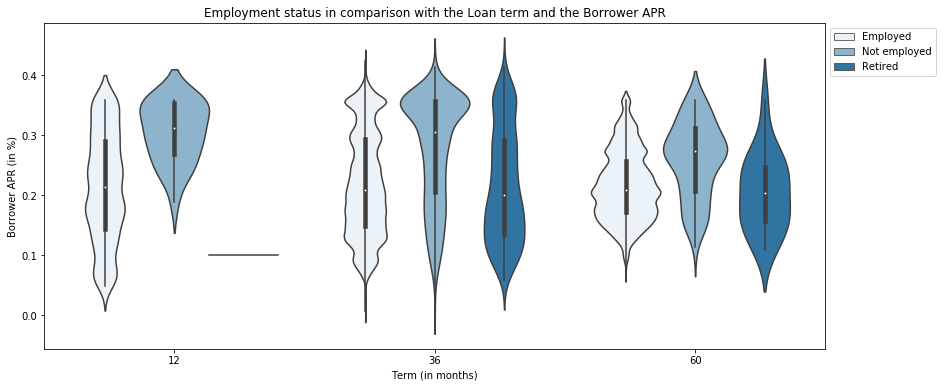

In [123]:
# Plot
plt.figure(figsize=[14, 6])
color=sb.color_palette()[0]
sb.violinplot(data=df_new, x="Term", y="BorrowerAPR", hue="EmploymentStatus", color=color)
plt.title('Employment status in comparison with the Loan term and the Borrower APR')
plt.xlabel('Term (in months)')
plt.ylabel('Borrower APR (in %)')
plt.legend(bbox_to_anchor=(1,1), loc=2);

Looking at the results for the term, I will investigate employed borrowers first. While shorter, 12 month, loans are covering the whole range of rates, the range descreases the longer the loan term. Not employed borrowers start already at high rates, with a median of over 0.3, and the APR span is interestingly widening for terms of 26 months. while still paying higher fees than employed borrowers, there are still plenty of borrowers being able to secure a lower APR than within a 12 month term. For a 36 month term the span is shrinking, but we can see that the median is lower than for 36 term loans and the conditions seem to be better for unemployed borrowers for long term.
For retired borrowers it is interesting to see that there is barely any retired borrower taking loans for 12 months. They are taking loans for 36 months with a similar outcome as employed borrowers, but with a slighly better/lower APR then these. For 60 month term loans the conditions are similar to the employed borrowers as well.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I found out in the bivariate exploration that owning a house can be advantageous in terms of the heigth of the Borrower APR. I now added the employment status and found out that owning a house has indeed a small positive effect in payiny less high APR than when not owning a house. But this is only true for employed and retired borrowers. Unemployed borrowers with a house can pay higher APR than non owners.

Looking at the loan amount, we were able to detect a tendency for lower APR with higher loan amounts. This seems to be the case only for employed borrowers. Unemployed borrowers tend to have a lower variety in offered APR and even higher APR the higher the taken loan. Retired borrowers on the other hand have a similar output as employed borrowers but with s teeper decline in APR with rising loan amount.

Looking at the loan term and the APR, we previously found out thst the APR is getting more consolidated with rising loan terms. As we bring in the employment status, we see that this development is only true for unemployed borrowers. While having in general a higher APR with short term loans, the APR is getting lower with a longer loan term. For employed borrowers the span is getting lower as well with rising term length, but the median APR of all terms stays the same. 


### Were there any interesting or surprising interactions between features?

It is surprising to see that there are no retired borrowers in the dataset taking 12 month loans as they stick only to 26 or 60 month loans.

## Conclusions

The overall goal was to find out what factors are influencing the Borrower APR. I first had a look at variables out of the original dataset where I thought they could deliver some information and could be influencial. This new dataset I was exploring within an univariate exploration first. I layed the groundwork and found out about the general distribution of the feature values.

For example:
The Borrower APR mean is at 0.22 with values going down to 0.05 and up to 0.4.
The open credit lines showed an astonishing image as almost all borrowers have at least one other credit loan open at the time the current loan is taken, going up to 40 current open lines. As this would seem risky the more current lines are open, I asumed that this will negatively affect the Borrower APR.
I discovered that the mayority of loans are 36 month loans, followed by 60 and 12 month loans, leaving 12 month loans far behind. I then had a look at the house ownership a found out that the distribution of house and non house owners is almost even amongst all the borrowers.
Also over 90 percent of the borrowers are employed and taking most loans for dept consolidation. Also there are many borrowers having other loans open that are past due.

After having everything I needed, I headed over to the bivariate exploration and was looking at the relationship between the feature of interest, the Borrower APR, and other numeric features. The heatplot provided me with the information to look at the relationship between APR and the loan amount, as well as the APR in relation to the trades that were never delinquent.
The height of the taken loan is negatively influencing the Borrower APR as with rising loan amount the range of the APR is getting smaller and loans seem to get cheaper. For the loans that are never delinquent I discovered a negative correlation as well, as with a smaller percentage in having loans that are not delinquent, only higher APR are available. Ergo, 100 percent in credits payed in time gives borrowers a better standing in the variety in APR, getting also to lower and cheaper options.
Looking at the term I discovered that the longer a credit is running, the less APR options are available and the span of the APR is narrowing down, leaving out extreme cheap or expensive rates.

Then looking at the categorical comparison with the Borrower APR, the rating features have the most influence in the rates a borrower needs to pay as there are given APR ranges per scoring level. The higher the scoring, the cheaper the loan rates for the borrower. Owning a home and being employed or retired also helps in getting a better Borrower APR in general as the rates are a bit lower than with not owning a house or being unemployed.
The categories seem to play a part in the APR, with loans for cosmetic procedures ranging the highest mean APR, but most borrowers take dept consolidation loans, that range mostly in the lower half aof the APR.  

For the last piece I looked at some correlations from the bivariate exploration and added another feature to find out more in detail. I added the employment status to house owners and discovered a lightly better APR if owning a house and being employed or retired. I continued looking at the employment status in correlation with other features and found out that higher loans for unemployed borrowers go hand in hand with a rising APR while the rates are getting lower for employed and retired borrowers the higher the loan amount. Additionally unemployed borrowers only could get better APR conditions with longer loan runtimes, while still paying higher APR than employed or retired borrowers.